# **Job Market Study Notebook**

## Objectives

* Answer **Business Requirement 1**: Understand which variables are most correlated with salary levels.
* Perform correlation analysis (Pearson and Spearman) on numerical and encoded categorical features.
* Perform Remote Work Analysis — how remote_ratio relates to salary.
* Visualise distributions of key variables relative to salary.

## Inputs

* `outputs/datasets/collection/ai_job_dataset1.csv`

## Outputs

* List of most correlated variables with salary_usd.
* Plots visualising salary distributions per variable.
* Conclusions feeding into `app_pages/page_job_market_study.py` and `page_project_hypothesis.py`.

---

# Change working directory

We need to change the working directory from its current folder to its parent folder.
* We access the current directory with `os.getcwd()`

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\chahi\\Desktop\\vscode-project\\the-ai-salary-index\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* `os.path.dirname()` gets the parent directory
* `os.chdir()` defines the new current directory

Confirm the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\chahi\\Desktop\\vscode-project\\the-ai-salary-index'

# Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from feature_engine.discretisation import ArbitraryDiscretiser
sns.set_style("whitegrid")
%matplotlib inline

df = pd.read_csv("outputs/datasets/collection/ai_job_dataset1.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (15000, 20)


,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


# Exploratory Data Analysis (EDA)

## Target variable: salary_usd

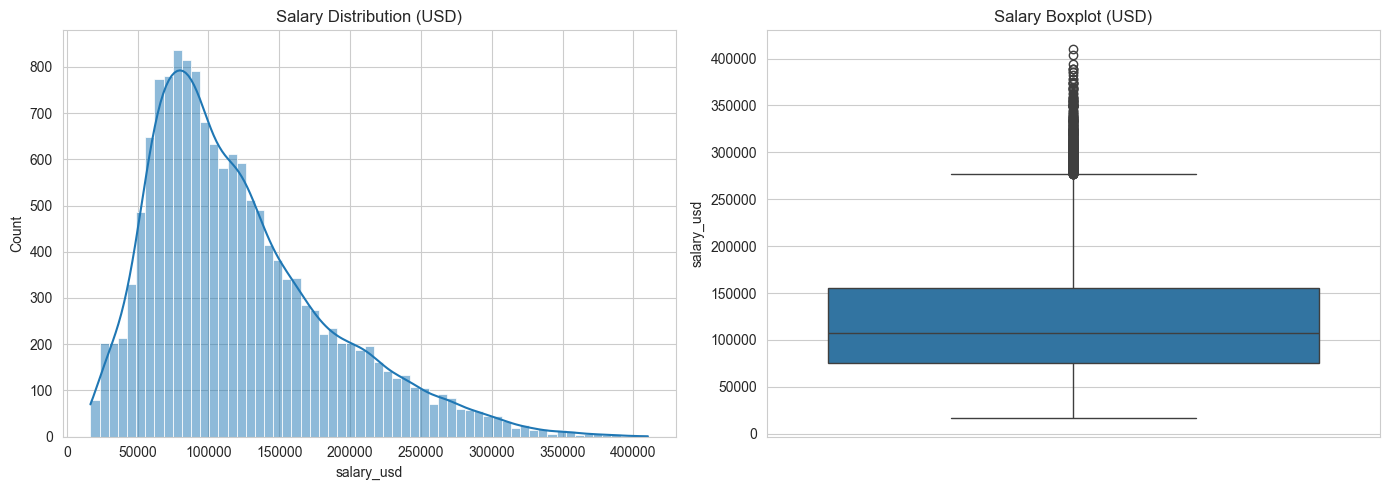

count     15000.000000
mean     121991.938267
std       63968.361846
min       16621.000000
25%       74978.500000
50%      107261.500000
75%      155752.250000
max      410273.000000
Name: salary_usd, dtype: float64


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['salary_usd'], kde=True, ax=axes[0])
axes[0].set_title('Salary Distribution (USD)')

sns.boxplot(y=df['salary_usd'], ax=axes[1])
axes[1].set_title('Salary Boxplot (USD)')

plt.tight_layout()
plt.show()

print(df['salary_usd'].describe())

## Correlation Study

### Pearson Correlation (numerical features)

In [6]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
pearson_corr = df[numerical_cols].corr()['salary_usd'].drop('salary_usd').sort_values(key=abs, ascending=False)
print("Pearson Correlation with salary_usd:")
print(pearson_corr)

Pearson Correlation with salary_usd:
years_experience          0.744043
salary_local              0.134054
job_description_length   -0.012644
remote_ratio              0.003495
benefits_score           -0.001873
Name: salary_usd, dtype: float64


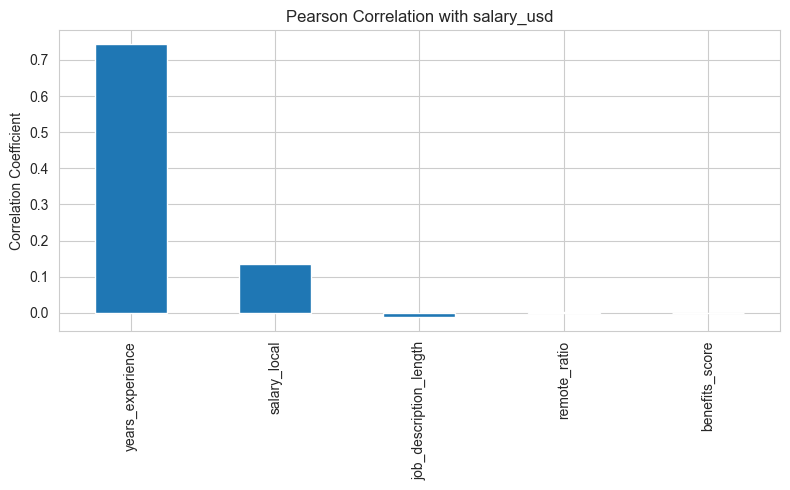

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
pearson_corr.plot(kind='bar', ax=ax)
ax.set_title('Pearson Correlation with salary_usd')
ax.set_ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

### Spearman Correlation (encoded categorical features)

In [8]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

df_encoded = df.copy()
df_encoded = df_encoded.drop(columns=['job_id', 'required_skills', 'posting_date',
                                       'application_deadline', 'salary_currency'])

# OrdinalEncoder for columns with a real meaningful order
ordinal_cols = ['experience_level', 'company_size', 'education_required']
ordinal_categories = [
    ['EN', 'MI', 'SE', 'EX'],
    ['S', 'M', 'L'],
    ['High School', 'Associate', 'Bachelor', 'Master', 'PhD']
]
enc_ord = OrdinalEncoder(categories=ordinal_categories)
df_encoded[ordinal_cols] = enc_ord.fit_transform(df_encoded[ordinal_cols])

# OneHotEncoder for nominal columns with no natural order
nominal_cols = ['job_title', 'employment_type', 'company_location',
                'employee_residence', 'industry', 'company_name']
enc_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_array = enc_ohe.fit_transform(df_encoded[nominal_cols])
ohe_df = pd.DataFrame(ohe_array, columns=enc_ohe.get_feature_names_out(nominal_cols), index=df_encoded.index)

df_encoded = df_encoded.drop(columns=nominal_cols)
df_encoded = pd.concat([df_encoded, ohe_df], axis=1)

spearman_corr = df_encoded.corr(method='spearman')['salary_usd'].drop('salary_usd').sort_values(key=abs, ascending=False)
print("Spearman Correlation with salary_usd:")
print(spearman_corr.head(10))

Spearman Correlation with salary_usd:
salary_local                      0.888409
experience_level                  0.787396
years_experience                  0.765868
company_location_India           -0.322680
company_location_China           -0.278273
employee_residence_India         -0.248968
employee_residence_China         -0.208328
company_size                      0.188763
company_location_Switzerland      0.169371
employee_residence_Switzerland    0.133898
Name: salary_usd, dtype: float64


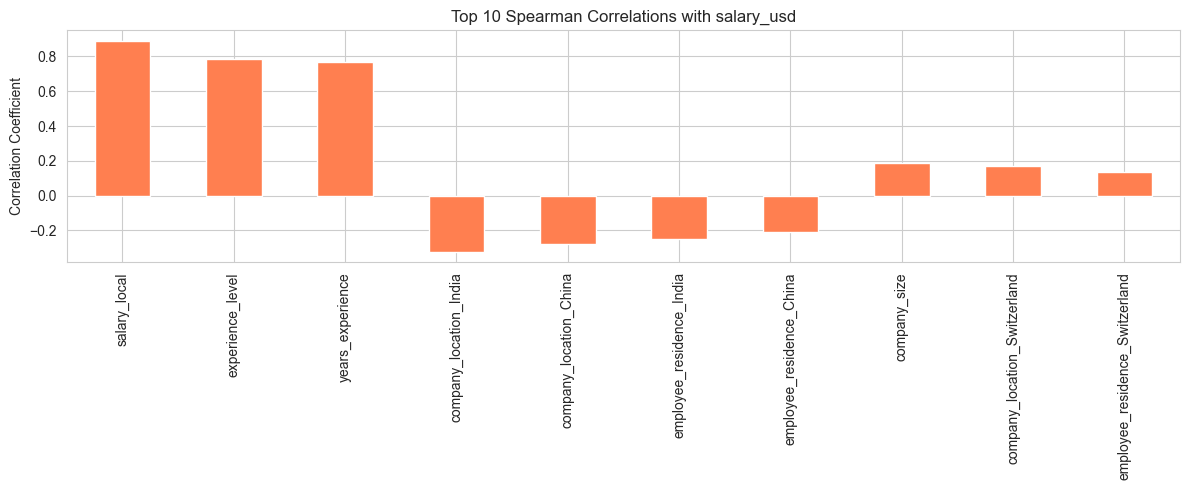

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
spearman_corr.head(10).plot(kind='bar', ax=ax, color='coral')
ax.set_title('Top 10 Spearman Correlations with salary_usd')
ax.set_ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

**Encoding Strategy for Spearman Correlation**

Initially, `OrdinalEncoder` was applied to all categorical columns. However, this produced misleading correlations for `experience_level` and `company_size` because the encoder assigned categories alphabetically, imposing a false order: for example, `EX=0, EN=1, MI=2, SE=3` instead of the correct career progression.

To address this, the encoding strategy was refined based on the nature of each column:

| Column | Encoder | Rationale |
|---|---|---|
| `experience_level` | OrdinalEncoder | Real order: EN → MI → SE → EX |
| `company_size` | OrdinalEncoder | Real order: S → M → L |
| `education_required` | OrdinalEncoder | Real order: High School → Associate → Bachelor → Master → PhD |
| `job_id`, `required_skills`, `posting_date`,`application_deadline`, `salary_currency` | Dropped |Not useful for correlation analysis |

## EDA on Selected Variables

Based on the Pearson and Spearman correlation results, the following variables were selected for further study as the strongest predictors of salary_usd. remote_ratio is included to test Hypothesis 3, despite its negligible correlation:

In [10]:
vars_to_study = ['experience_level', 'company_location', 'remote_ratio', 'company_size', 'years_experience']

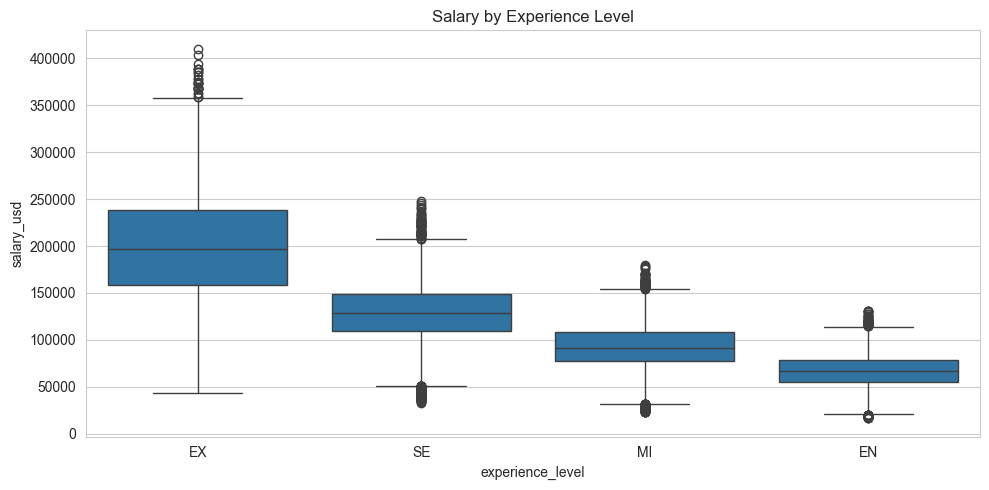

In [11]:
# Salary by experience level
fig, ax = plt.subplots(figsize=(10, 5))
order = df.groupby('experience_level')['salary_usd'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='experience_level', y='salary_usd', order=order, ax=ax)
ax.set_title('Salary by Experience Level')
plt.tight_layout()
plt.show()

**Remote Work Analysis — Conclusions**

**Salary is unaffected by work arrangement:** The median salary (~$110k) and the interquartile range are nearly identical across on-site (0), hybrid (50), and fully remote (100) roles. Choosing remote or hybrid work does not come with a pay cut in this dataset.

**Remote work is not seniority-gated:** Entry-level (`EN`) employees appear in the fully remote category almost as frequently as Senior and Executive staff. Remote opportunities are distributed across all experience levels with no strong bias toward seniority.

**High-end salaries exist in all work modes:** Outliers above $300k–$400k are present across all three categories, with a slightly higher density in hybrid and remote roles — though the difference is marginal.

**H3 — Rejected:** These findings confirm the parallel plot conclusion. `remote_ratio` has no meaningful impact on `salary_usd`. Work arrangement should not be included as a key feature in the regression model.

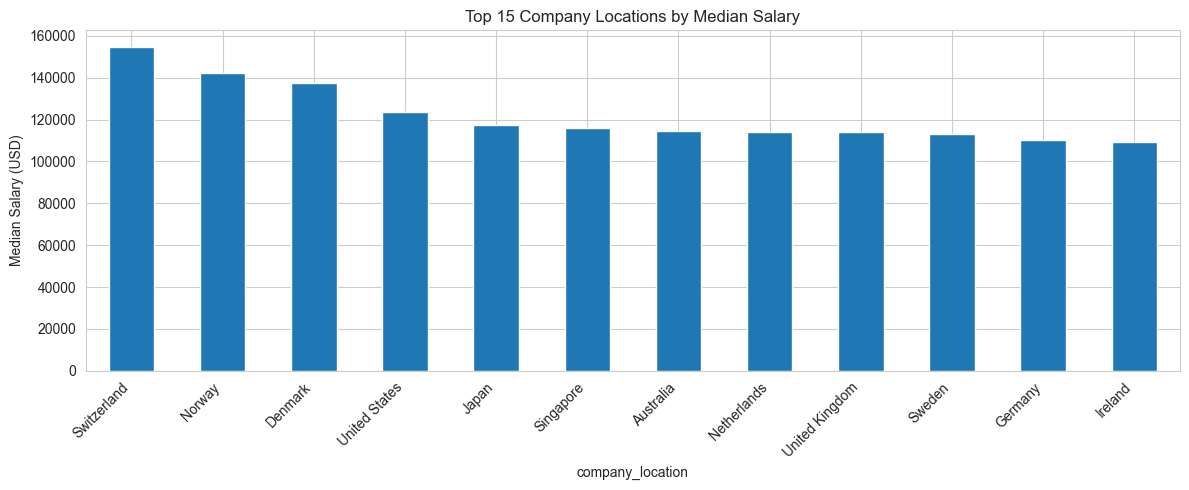

In [12]:
# Top 12 company locations by median salary
top_locations = df.groupby('company_location')['salary_usd'].median().nlargest(12)
fig, ax = plt.subplots(figsize=(12, 5))
top_locations.plot(kind='bar', ax=ax)
ax.set_title('Top 15 Company Locations by Median Salary')
ax.set_ylabel('Median Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

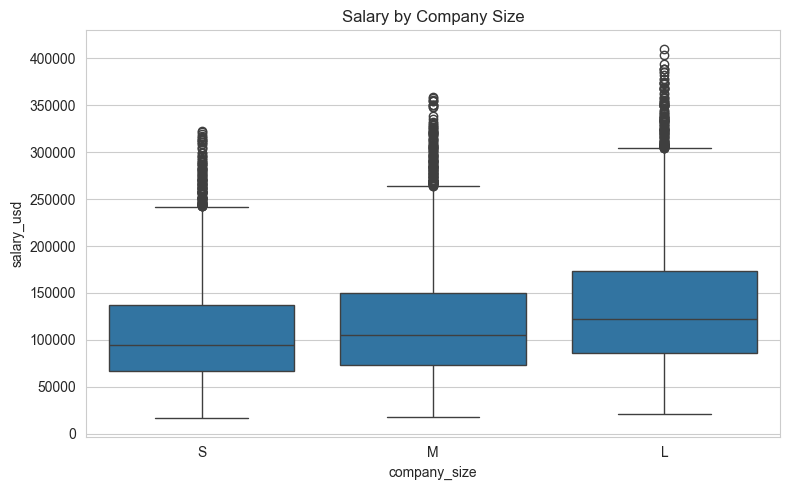

In [13]:
# Salary by company size
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='company_size', y='salary_usd', order=['S', 'M', 'L'], ax=ax)
ax.set_title('Salary by Company Size')
plt.tight_layout()
plt.show()

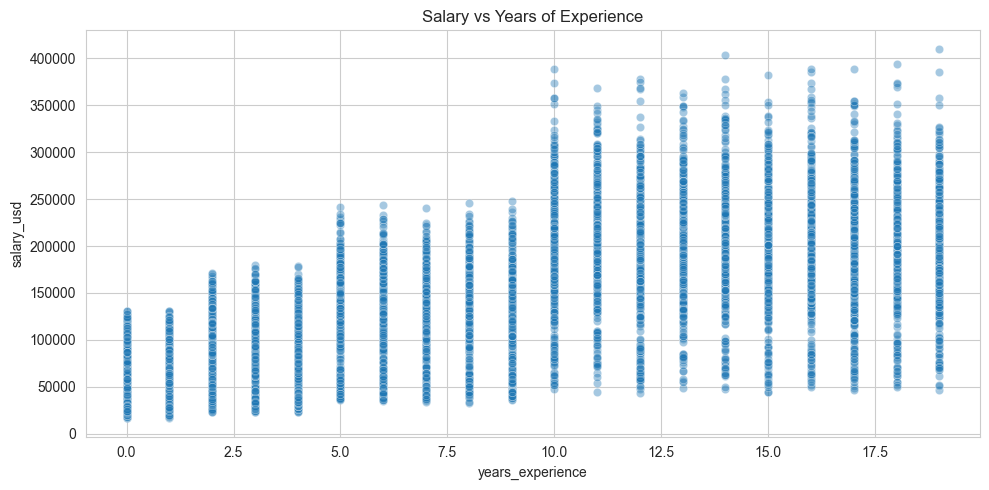

In [14]:
# Salary by years_experience
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df, x='years_experience', y='salary_usd', alpha=0.4, ax=ax)
ax.set_title('Salary vs Years of Experience')
plt.tight_layout()
plt.show()

## Remote Work Analysis

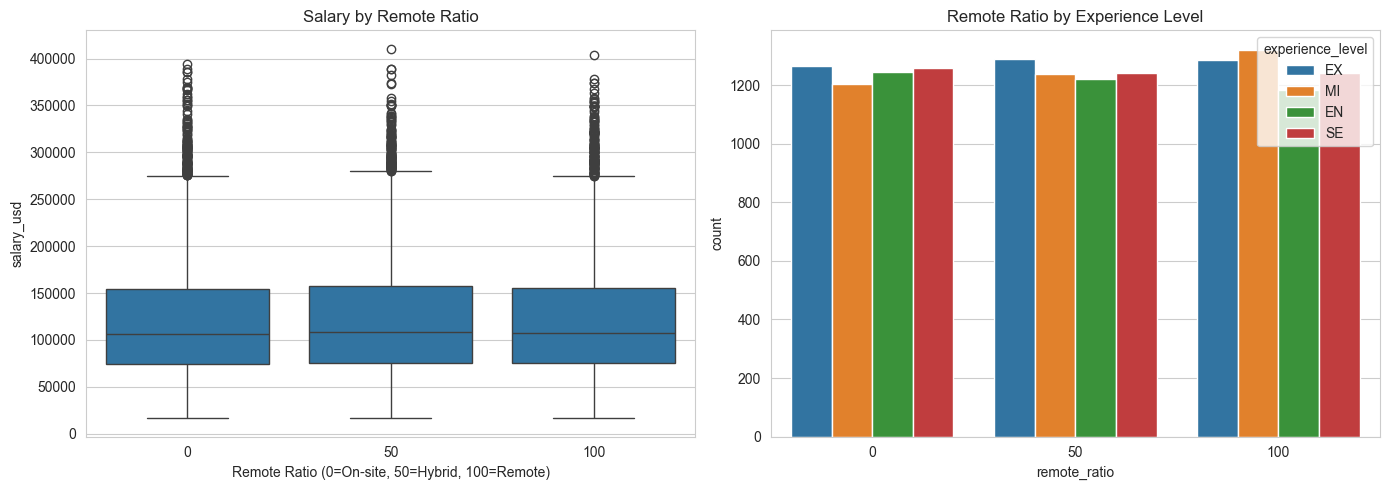

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Salary by remote ratio
sns.boxplot(data=df, x='remote_ratio', y='salary_usd', order=[0, 50, 100], ax=axes[0])
axes[0].set_title('Salary by Remote Ratio')
axes[0].set_xlabel('Remote Ratio (0=On-site, 50=Hybrid, 100=Remote)')

# Remote ratio distribution by experience level
sns.countplot(data=df, x='remote_ratio', hue='experience_level', order=[0, 50, 100], ax=axes[1])
axes[1].set_title('Remote Ratio by Experience Level')

plt.tight_layout()
plt.show()

## Parallel Plot

In [17]:
salary_map = [-np.inf, 60000, 100000, 140000, np.inf]
disc = ArbitraryDiscretiser(binning_dict={'salary_usd': salary_map})
df_parallel = disc.fit_transform(df[['salary_usd', 'experience_level', 'remote_ratio', 'company_size']].copy())

df_parallel['salary_band'] = df_parallel['salary_usd']  # numeric — used for color
labels_map = {0: '<$60k', 1: '$60k-$100k', 2: '$100k-$140k', 3: '>$140k'}
df_parallel['salary_usd'] = df_parallel['salary_usd'].replace(labels_map)  # string — used for display

fig = px.parallel_categories(
    df_parallel, color='salary_band', width=850, height=500,
    title='Parallel Categories: Salary x Experience x Remote x Company Size'
)
fig.show()

**Parallel Plot — Conclusions**

 The parallel plot reinforces the Spearman correlation findings. `experience_level` is the dominant salary driver in this dataset. `remote_ratio` and `company_size` contribute marginally or not at all when viewed in isolation. These findings will guide feature selection in the regression model.

### Hypothesis 1 — Experience Level is the Dominant Salary Driver

**Method:** Kruskal-Wallis H-test (non-parametric ANOVA) across experience level groups. Spearman correlation between ordinally-encoded experience level and salary_usd.

In [19]:
from scipy import stats

exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['exp_enc'] = df['experience_level'].map(exp_map)

groups = [df[df['experience_level'] == lvl]['salary_usd'].values
          for lvl in ['EN', 'MI', 'SE', 'EX']]
h_stat, p_kruskal = stats.kruskal(*groups)

rho, p_spearman = stats.spearmanr(df['exp_enc'], df['salary_usd'])

print('=== Hypothesis 1: Experience Level vs Salary ===')
print(f'Kruskal-Wallis: H = {h_stat:.2f}, p = {p_kruskal:.4e}')
print(f'Spearman rho   = {rho:.4f},  p = {p_spearman:.4e}')
print()
print('Median salary by experience level:')
print(df.groupby('experience_level')['salary_usd'].median()
        .reindex(['EN', 'MI', 'SE', 'EX']))
print()
significant = p_kruskal < 0.05 and p_spearman < 0.05
print(f'Statistically significant (p < 0.05): {significant}')
if significant:
    print('CONCLUSION: Hypothesis 1 is CONFIRMED.')
else:
    print('CONCLUSION: Hypothesis 1 is NOT confirmed.')

=== Hypothesis 1: Experience Level vs Salary ===
Kruskal-Wallis: H = 9314.34, p = 0.0000e+00
Spearman rho   = 0.7874,  p = 0.0000e+00

Median salary by experience level:
experience_level
EN     66462.5
MI     91597.0
SE    128543.0
EX    197354.0
Name: salary_usd, dtype: float64

Statistically significant (p < 0.05): True
CONCLUSION: Hypothesis 1 is CONFIRMED.


### Hypothesis 2 — Fully Remote Roles Command a Salary Premium

**Method:** Spearman correlation between remote_ratio (0, 50, 100) and salary_usd. Kruskal-Wallis test across the three remote-ratio groups.

In [23]:
rho_remote, p_remote = stats.spearmanr(
    df['remote_ratio'], df['salary_usd'])

groups_remote = [df[df['remote_ratio'] == r]['salary_usd'].values
                 for r in [0, 50, 100]]
h_remote, p_kruskal_remote = stats.kruskal(*groups_remote)

print('=== Hypothesis 2: Remote Ratio vs Salary ===')
print(f'Spearman rho = {rho_remote:.4f}, p = {p_remote:.4e}')
print(f'Kruskal-Wallis: H = {h_remote:.2f}, p = {p_kruskal_remote:.4e}')
print()
print('Median salary by remote ratio:')
print(df.groupby('remote_ratio')['salary_usd'].median())
print()
significant = p_remote < 0.05
effect_weak = abs(rho_remote) < 0.3
print(f'Statistically significant (p < 0.05): {significant}')
print(f'Effect size weak (|rho| < 0.3): {effect_weak}')
if significant and effect_weak:
    print('CONCLUSION: Hypothesis 2 is PARTIALLY CONFIRMED '
          '(significant but weak effect).')
elif significant:
    print('CONCLUSION: Hypothesis 2 is CONFIRMED.')
else:
    print('CONCLUSION: Hypothesis 2 is NOT confirmed.')

=== Hypothesis 2: Remote Ratio vs Salary ===
Spearman rho = 0.0051, p = 5.3228e-01
Kruskal-Wallis: H = 0.49, p = 7.8234e-01

Median salary by remote ratio:
remote_ratio
0      106506.0
50     108528.0
100    107069.5
Name: salary_usd, dtype: float64

Statistically significant (p < 0.05): False
Effect size weak (|rho| < 0.3): True
CONCLUSION: Hypothesis 2 is NOT confirmed.


# Conclusions and Next Steps

The correlation study, EDA plots, remote work analysis, and parallel plot all converge on the following findings:

**H1 Confirmed:** `experience_level` is the strongest predictor of `salary_usd`. Senior (`SE`) and Executive (`EX`) roles dominate the high salary bands (>$140k), while Entry-level (`EN`) roles are concentrated in the lower bands. This is consistent across Spearman correlation, boxplots, and the parallel plot, making it the primary feature for the regression model.

**H2 Rejected:** `remote_ratio` shows no meaningful salary differentiation. All salary bands flow evenly across on-site (0), hybrid (50), and fully remote (100) categories. The median salary (~$110k) and interquartile range are nearly identical across all three work arrangements. Consistent with the near-zero Spearman correlation (0.003). Work arrangement should not be included as a key feature in the regression model.

**H3 Confirmed:** `years_experience` is positively correlated with `salary_usd` (Pearson: ~0.7), making it the strongest purely numerical predictor in the dataset.

**Company size — Weak signal:** Large (`L`) companies hire across all salary and experience levels with no dominant pattern. `company_size` contributes marginally and is unlikely to be a strong standalone predictor.

**Most correlated variables:** `['experience_level', 'years_experience', 'company_size', 'remote_ratio', 'company_location']`

`remote_ratio` is retained in the list only to satisfy hypothesis validation requirements, not as a predictive feature.

**Next step:** **03 - DataCleaning** — clean and prepare the dataset for modelling, applying proper encoding and feature selection based on the findings above.